# GRIP @ The Sparks Foundation
## March 2022 - Data Science & Business Analytics Internship


## Author - Hreeya Singh
### Beginner Level Task
## Task1 - Predict the percentage of a student based on the no. of study hours.

Dataset Link - http://bit.ly/w-data

Import these libraries

In [46]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)

In [39]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [40]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [35]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [36]:
data.sample(7)

,Hours,Scores
10,7.7,85
24,7.8,86
21,4.8,54
0,2.5,21
18,6.1,67
14,1.1,17
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data['Hours'].min()

1.1

In [7]:
data['Hours'].max()

9.2

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#We can also use .corr to determine the correlation between the variables

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visuslization

<AxesSubplot:ylabel='Scores'>

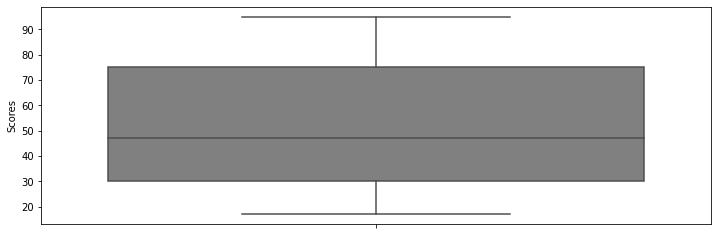

In [12]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data,y='Scores',color='grey')

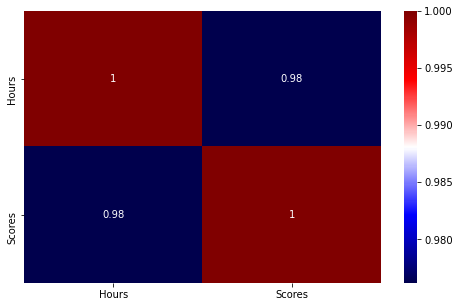

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True,cmap='seismic')
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='count'>

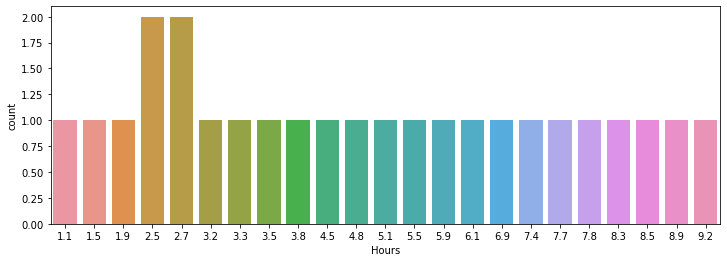

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(data=data,x='Hours')

<AxesSubplot:xlabel='Scores', ylabel='count'>

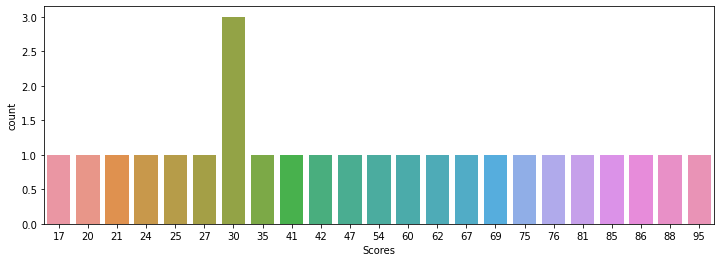

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(data=data,x='Scores')

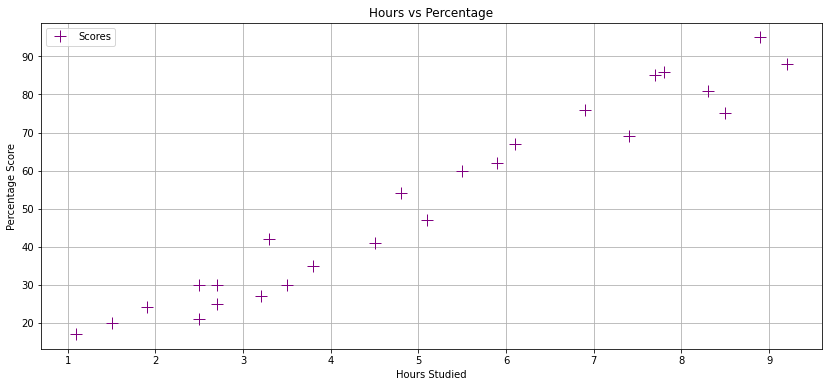

In [16]:
plt.rcParams["figure.figsize"] = [14,6]
data.plot(x='Hours',y='Scores',style='+',color='purple',markersize='12')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [17]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Create Linear Regression model

In [19]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, y_train) 

print("Yippee! Training is complete ✌🏻.")

Yippee! Training is complete ✌🏻.


In [21]:
print(type(LR))

<class 'sklearn.linear_model._base.LinearRegression'>


## Plotting the regression line

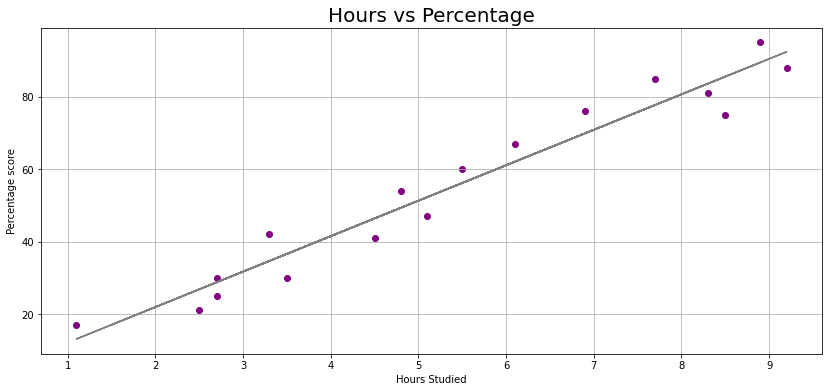

In [44]:
line = LR.coef_*X + LR.intercept_

#plotting for training data
plt.rcParams["figure.figsize"] = [14,6]
plt.scatter(X_train,y_train,color='purple')
plt.plot(X,line,color='grey')
plt.title('Hours vs Percentage',size=20) 
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

In [22]:
print(X_test) # Testing data - In Hours
y_pred = LR.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [23]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [24]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing Actual vs Predicted

In [25]:
df = pd.DataFrame({'Actual data': y_test, 'Predicted data': y_pred})  
df 

,Actual data,Predicted data
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#Now testing the given test data 9.25 hrs

In [26]:
hours = 9.25
LR_pred = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(LR_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [27]:
LR.coef_  #m

array([9.78856669])

In [28]:
LR.intercept_  #b

2.3708153823418883

### Y = m * X + b (m is coefficient and b is intercept)

In [29]:
9.78856669*9.25+2.3708153823418883

92.91505726484189

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
R2: 0.9568211104435257


# Thankyou